<a href="https://colab.research.google.com/github/hanafimajid/tpot-mtr/blob/main/scm20d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tpot
from tpot import TPOTRegressor
import pandas as pd


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 813.3 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 8.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11937 sha256=0a8f0dfa99738b024a988f444e7310e582f6e80377aec87efccdf30e7dc0a209
  Stored in directory: /root/.cache/pip/wheels/af/f9/87/bf5b3d565c2a007b4dae9d8142dccc85a9f164e517062dd519
Successfully built stopit


In [2]:
#importing data from a local CSV file
from google.colab import files
uploaded = files.upload()


Saving csv_result-scm20d.csv to csv_result-scm20d.csv


In [3]:
import pandas as pd
df = pd.read_csv("csv_result-scm20d.csv")
df.head()
y_col = [
'LBL',
'MTLp2A',
'MTLp3A',
'MTLp4A',
'MTLp5A',
'MTLp6A',
'MTLp7A',
'MTLp8A',
'MTLp9A',
'MTLp10A',
'MTLp11A',
'MTLp12A',
'MTLp13A',
'MTLp14A',
'MTLp15A',
'MTLp16A'
]
y = df[y_col]
#x_col_id = ['id']
#x_id = df[x_col_id]
y.head()
#X_col = ['Xloc','Yloc','Cr','Ni','Zn','Co']
#X = df[X_col]
#X = df[df.columns.drop(y)]
#X=df.drop(columns=['id'])
X=df[df.columns.drop(y)]
#X=df.drop(y,x_id)
y.head()


,LBL,MTLp2A,MTLp3A,MTLp4A,MTLp5A,MTLp6A,MTLp7A,MTLp8A,MTLp9A,MTLp10A,MTLp11A,MTLp12A,MTLp13A,MTLp14A,MTLp15A,MTLp16A
0,1424,1519,1507,1581,1879,1776,1747,1905,1414,1336,1409,1535,1795,1871,1783,1649
1,1432,1688,1532,1639,1904,1841,1794,2060,1270,1404,1405,1486,1786,2077,1803,1650
2,1391,1612,1547,1599,1977,1853,1774,1876,1397,1444,1400,1505,1871,2050,1751,1653
3,1424,1544,1414,1558,1937,1879,1760,1820,1315,1477,1419,1546,1833,2070,1798,1645
4,1444,1536,1499,1598,1915,1854,1780,1846,1435,1412,1305,1455,1847,2024,1775,1646


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size = 0.20, random_state = 123)
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.impute import SimpleImputer
# Initialize the scaler
scaler = StandardScaler()

robust_scaler_X = RobustScaler()
X_train_scaled = robust_scaler_X.fit_transform(X_train)
X_test_scaled = robust_scaler_X.transform(X_test)
# Apply robust scaling to the target features (y)
robust_scaler_y = RobustScaler()

from sklearn.preprocessing import QuantileTransformer

X_train = X_train_scaled
X_test = X_test_scaled



In [5]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.multioutput import MultiOutputRegressor
#rfg = MultiOutputRegressor(RandomForestRegressor(n_estimators=100,criterion='squared_error'))
rfg = MultiOutputRegressor(TPOTRegressor(generations=1, population_size=5,verbosity=2, random_state=123,max_time_mins=None, max_eval_time_mins=5, cv=10))

rfg.fit(X_train, y_train)
y_pred = rfg.predict(X_test)
rfg.score(X_test, y_test)




Optimization Progress:   0%|          | 0/10 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -14822.790878819147

Best pipeline: GradientBoostingRegressor(input_matrix, alpha=0.95, learning_rate=0.1, loss=huber, max_depth=2, max_features=1.0, min_samples_leaf=11, min_samples_split=3, n_estimators=100, subsample=0.05)


Optimization Progress:   0%|          | 0/10 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -17315.128039585506

Best pipeline: GradientBoostingRegressor(input_matrix, alpha=0.95, learning_rate=0.1, loss=huber, max_depth=2, max_features=1.0, min_samples_leaf=11, min_samples_split=3, n_estimators=100, subsample=0.05)


Optimization Progress:   0%|          | 0/10 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -17853.285926901015

Best pipeline: GradientBoostingRegressor(input_matrix, alpha=0.95, learning_rate=0.1, loss=huber, max_depth=2, max_features=1.0, min_samples_leaf=11, min_samples_split=3, n_estimators=100, subsample=0.05)


Optimization Progress:   0%|          | 0/10 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -22644.237674427113

Best pipeline: GradientBoostingRegressor(input_matrix, alpha=0.95, learning_rate=0.1, loss=huber, max_depth=2, max_features=1.0, min_samples_leaf=11, min_samples_split=3, n_estimators=100, subsample=0.05)


Optimization Progress:   0%|          | 0/10 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -28536.774255183787

Best pipeline: XGBRegressor(ZeroCount(input_matrix), learning_rate=0.01, max_depth=7, min_child_weight=13, n_estimators=100, n_jobs=1, objective=reg:squarederror, subsample=1.0, verbosity=0)


Optimization Progress:   0%|          | 0/10 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -33400.79272606589

Best pipeline: XGBRegressor(ZeroCount(input_matrix), learning_rate=0.01, max_depth=7, min_child_weight=13, n_estimators=100, n_jobs=1, objective=reg:squarederror, subsample=1.0, verbosity=0)


Optimization Progress:   0%|          | 0/10 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -35456.21694859996

Best pipeline: XGBRegressor(input_matrix, learning_rate=0.01, max_depth=7, min_child_weight=13, n_estimators=100, n_jobs=1, objective=reg:squarederror, subsample=1.0, verbosity=0)


Optimization Progress:   0%|          | 0/10 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -40335.582153486954

Best pipeline: XGBRegressor(input_matrix, learning_rate=0.01, max_depth=7, min_child_weight=13, n_estimators=100, n_jobs=1, objective=reg:squarederror, subsample=1.0, verbosity=0)


Optimization Progress:   0%|          | 0/10 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -17175.391709831874

Best pipeline: GradientBoostingRegressor(input_matrix, alpha=0.95, learning_rate=0.1, loss=huber, max_depth=2, max_features=1.0, min_samples_leaf=11, min_samples_split=3, n_estimators=100, subsample=0.05)


Optimization Progress:   0%|          | 0/10 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -21517.57314168532

Best pipeline: XGBRegressor(input_matrix, learning_rate=0.01, max_depth=7, min_child_weight=13, n_estimators=100, n_jobs=1, objective=reg:squarederror, subsample=1.0, verbosity=0)


Optimization Progress:   0%|          | 0/10 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -18821.426443170007

Best pipeline: XGBRegressor(input_matrix, learning_rate=0.01, max_depth=7, min_child_weight=13, n_estimators=100, n_jobs=1, objective=reg:squarederror, subsample=1.0, verbosity=0)


Optimization Progress:   0%|          | 0/10 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -22646.314478573397

Best pipeline: XGBRegressor(ZeroCount(input_matrix), learning_rate=0.01, max_depth=7, min_child_weight=13, n_estimators=100, n_jobs=1, objective=reg:squarederror, subsample=1.0, verbosity=0)


Optimization Progress:   0%|          | 0/10 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -29399.970152414695

Best pipeline: XGBRegressor(input_matrix, learning_rate=0.01, max_depth=7, min_child_weight=13, n_estimators=100, n_jobs=1, objective=reg:squarederror, subsample=1.0, verbosity=0)


Optimization Progress:   0%|          | 0/10 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -33411.96301491052

Best pipeline: XGBRegressor(ZeroCount(input_matrix), learning_rate=0.01, max_depth=7, min_child_weight=13, n_estimators=100, n_jobs=1, objective=reg:squarederror, subsample=1.0, verbosity=0)


Optimization Progress:   0%|          | 0/10 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -33436.35236031121

Best pipeline: GradientBoostingRegressor(input_matrix, alpha=0.95, learning_rate=0.1, loss=huber, max_depth=2, max_features=1.0, min_samples_leaf=11, min_samples_split=3, n_estimators=100, subsample=0.05)


Optimization Progress:   0%|          | 0/10 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -37047.359780442675

Best pipeline: GradientBoostingRegressor(input_matrix, alpha=0.95, learning_rate=0.1, loss=huber, max_depth=2, max_features=1.0, min_samples_leaf=11, min_samples_split=3, n_estimators=100, subsample=0.05)


0.6420075025949675

In [6]:
import math
import numpy as np
from statistics import mean
from sklearn.metrics import mean_squared_error as morrfr_mse
from sklearn.metrics import mean_absolute_error as morrfr_mae
morrfr_rmse1=math.sqrt(morrfr_mse(y_test, y_pred))
print('RMSE for morrfr is',morrfr_rmse1)
morrfr_mae1=morrfr_mae(y_test, y_pred)
print('MAE for morrfr is',morrfr_mae1)
# Calculate mean of true values
mean_true_values = np.mean(y_test)
# Calculate relative RMSE
relative_rmse = morrfr_rmse1 / mean_true_values
# Calculate Average Relative RMSE
average_relative_rmse = np.mean(relative_rmse)
# Calculate Percentage of Average Relative RMSE
percentage_average_relative_rmse = average_relative_rmse * 100
print("mean_test_values:",mean_true_values)
print("RMSE:", morrfr_rmse1)
print("Relative RMSE:", relative_rmse)
print("arrmse:", average_relative_rmse)
print(f"Percentage arrmse = {percentage_average_relative_rmse:.2f}%")
# Calculate RMSE for each output
rmse_per_output = np.sqrt(morrfr_mse(y_test, y_pred, multioutput='raw_values'))
print('rmse_per_output:',rmse_per_output)

RMSE for morrfr is 158.37985594804863
MAE for morrfr is 119.24800935037196
mean_test_values: LBL        1201.397993
MTLp2A     1280.738016
MTLp3A     1281.409142
MTLp4A     1364.337793
MTLp5A     1562.337235
MTLp6A     1653.935340
MTLp7A     1650.579710
MTLp8A     1732.736901
MTLp9A     1183.742475
MTLp10A    1269.099220
MTLp11A    1266.126533
MTLp12A    1346.075251
MTLp13A    1568.960424
MTLp14A    1650.235786
MTLp15A    1640.720178
MTLp16A    1721.979376
dtype: float64
RMSE: 158.37985594804863
Relative RMSE: LBL        0.131830
MTLp2A     0.123663
MTLp3A     0.123598
MTLp4A     0.116086
MTLp5A     0.101374
MTLp6A     0.095759
MTLp7A     0.095954
MTLp8A     0.091404
MTLp9A     0.133796
MTLp10A    0.124797
MTLp11A    0.125090
MTLp12A    0.117660
MTLp13A    0.100946
MTLp14A    0.095974
MTLp15A    0.096531
MTLp16A    0.091975
dtype: float64
arrmse: 0.1104023340084025
Percentage arrmse = 11.04%
rmse_per_output: [116.87421802 123.66266261 130.30033096 145.0843299  165.57703945
 179.3124331

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


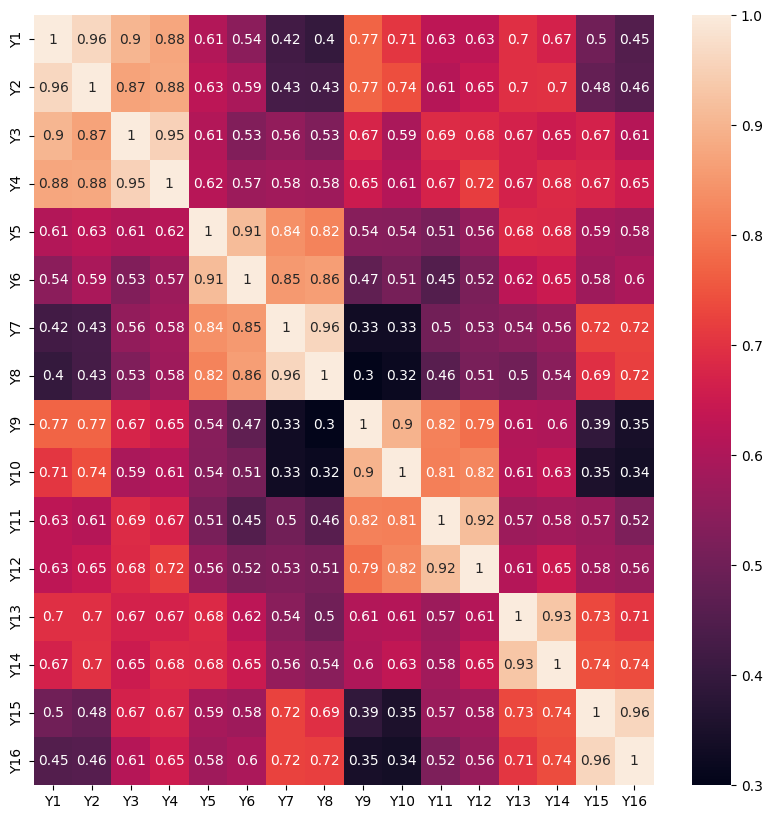

In [12]:
from tables import Column
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10))
# taking all rows but only 6 columns
df_small=pd.DataFrame(y_pred)
#df_small = y_test.iloc[:,:3]
features=['Y1','Y2','Y3','Y4','Y5','Y6','Y7','Y8','Y9','Y10','Y11','Y12','Y13','Y14','Y15','Y16']
correlation_mat = df_small.corr('pearson')
sns.heatmap(correlation_mat, annot = True,yticklabels=features,xticklabels=features)
plt.show()

In [10]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.multioutput import RegressorChain
reg = LinearSVR(epsilon=0.0, tol=0.0001, C=1.0, loss='epsilon_insensitive', fit_intercept=True, intercept_scaling=1.0, dual=True, verbose=2, random_state=None, max_iter=1000)
chain = RegressorChain(base_estimator=reg, order=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]).fit(X_train, y_train)
#chain.fit(X_train, y_train)
y_pred2 = chain.predict(X_test)
chain.score(X_test, y_test)

[LibLinear][LibLinear]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.3387110187894625

In [11]:
import math
import numpy as np
from statistics import mean
from sklearn.metrics import mean_squared_error as morrfr_mse
from sklearn.metrics import mean_absolute_error as morrfr_mae
morrfr_rmse2=math.sqrt(morrfr_mse(y_test, y_pred2))
print('RMSE for morrfr is',morrfr_rmse2)
morrfr_mae2=morrfr_mae(y_test, y_pred2)
print('MAE for morrfr is',morrfr_mae2)
# Calculate mean of true values
mean_true_values = np.mean(y_test)
# Calculate relative RMSE
relative_rmse = morrfr_rmse2 / mean_true_values
# Calculate Average Relative RMSE
average_relative_rmse = np.mean(relative_rmse)
# Calculate Percentage of Average Relative RMSE
percentage_average_relative_rmse = average_relative_rmse * 100
print("mean_test_values:",mean_true_values)
print("RMSE:", morrfr_rmse2)
print("Relative RMSE:", relative_rmse)
print("arrmse:", average_relative_rmse)
print(f"Percentage arrmse = {percentage_average_relative_rmse:.2f}%")
# Calculate RMSE for each output
rmse_per_output = np.sqrt(morrfr_mse(y_test, y_pred2, multioutput='raw_values'))
print('rmse_per_output:',rmse_per_output)

RMSE for morrfr is 215.9607566125629
MAE for morrfr is 162.66805438801484
mean_test_values: LBL        1201.397993
MTLp2A     1280.738016
MTLp3A     1281.409142
MTLp4A     1364.337793
MTLp5A     1562.337235
MTLp6A     1653.935340
MTLp7A     1650.579710
MTLp8A     1732.736901
MTLp9A     1183.742475
MTLp10A    1269.099220
MTLp11A    1266.126533
MTLp12A    1346.075251
MTLp13A    1568.960424
MTLp14A    1650.235786
MTLp15A    1640.720178
MTLp16A    1721.979376
dtype: float64
RMSE: 215.9607566125629
Relative RMSE: LBL        0.179758
MTLp2A     0.168622
MTLp3A     0.168534
MTLp4A     0.158290
MTLp5A     0.138229
MTLp6A     0.130574
MTLp7A     0.130839
MTLp8A     0.124636
MTLp9A     0.182439
MTLp10A    0.170169
MTLp11A    0.170568
MTLp12A    0.160437
MTLp13A    0.137646
MTLp14A    0.130867
MTLp15A    0.131626
MTLp16A    0.125414
dtype: float64
arrmse: 0.15054042978842125
Percentage arrmse = 15.05%
rmse_per_output: [130.15787809 148.00252286 151.2179411  190.02963896 234.44420382
 268.40098123

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


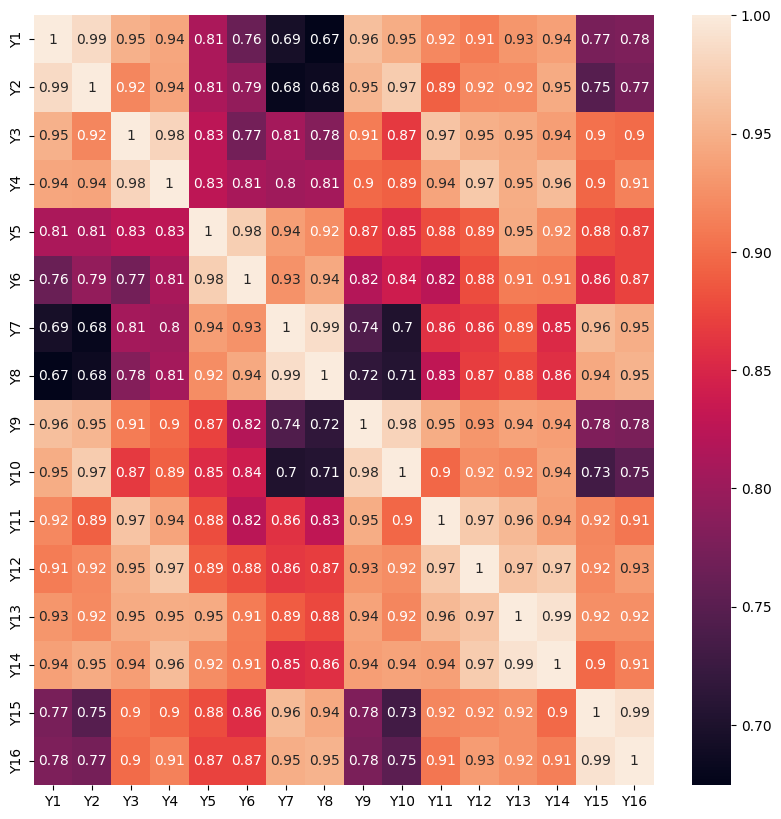

In [14]:
from tables import Column
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10))
# taking all rows but only 6 columns
df_small=pd.DataFrame(y_pred2)
#df_small = y_test.iloc[:,:3]
features=['Y1','Y2','Y3','Y4','Y5','Y6','Y7','Y8','Y9','Y10','Y11','Y12','Y13','Y14','Y15','Y16']
correlation_mat = df_small.corr('pearson')
sns.heatmap(correlation_mat, annot = True,yticklabels=features,xticklabels=features)
plt.show()

In [15]:
from sklearn.svm import LinearSVR
class MultiOutputTP(object):
  def __init__(self, *args, **kwargs):
    self.args = args
    self.kwargs = kwargs
  def fit(self, X, y):
    X, y = map(np.atleast_2d, (X, y))
    assert X.shape[0] == y.shape[0]
    yy = y.shape[1]
    self.regs = []
    for i in range(yy):
#while i <= Ny:
      reg = TPOTRegressor(generations=1, population_size=5,verbosity=2, random_state=123,n_jobs=1, max_time_mins=None, max_eval_time_mins=5, cv=10)
      #reg = LinearSVR(epsilon=0.0, tol=0.0001, C=1.0, loss='epsilon_insensitive', fit_intercept=True, intercept_scaling=1.0, dual=True, verbose=1, random_state=123, max_iter=10000)
      Xi = np.hstack([X, y[:, :i]])
      yi = y[:, i]
      self.regs.append(reg.fit(Xi, yi))


    return self
  def predict(self, X):
    y = np.empty([X.shape[0], len(self.regs)])
    for i, reg in enumerate(self.regs):
      y[:, i] = reg.predict(np.hstack([X, y[:, :i]]))
    return y


In [16]:
import numpy as np
from tpot import decorators
#decorators.MAX_EVAL_SECS = 240
reg2 = MultiOutputTP(10).fit(X_train, y_train)
#X = np.dtype('float64')



Optimization Progress:   0%|          | 0/10 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -14822.790878819147

Best pipeline: GradientBoostingRegressor(input_matrix, alpha=0.95, learning_rate=0.1, loss=huber, max_depth=2, max_features=1.0, min_samples_leaf=11, min_samples_split=3, n_estimators=100, subsample=0.05)


Optimization Progress:   0%|          | 0/10 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -7066.011215923412

Best pipeline: GradientBoostingRegressor(input_matrix, alpha=0.95, learning_rate=0.1, loss=huber, max_depth=2, max_features=1.0, min_samples_leaf=11, min_samples_split=3, n_estimators=100, subsample=0.05)


Optimization Progress:   0%|          | 0/10 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -9759.089915846907

Best pipeline: GradientBoostingRegressor(input_matrix, alpha=0.95, learning_rate=0.1, loss=huber, max_depth=2, max_features=1.0, min_samples_leaf=11, min_samples_split=3, n_estimators=100, subsample=0.05)


Optimization Progress:   0%|          | 0/10 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -7747.254394184363

Best pipeline: GradientBoostingRegressor(input_matrix, alpha=0.95, learning_rate=0.1, loss=huber, max_depth=2, max_features=1.0, min_samples_leaf=11, min_samples_split=3, n_estimators=100, subsample=0.05)


Optimization Progress:   0%|          | 0/10 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -26170.725983487828

Best pipeline: XGBRegressor(input_matrix, learning_rate=0.01, max_depth=7, min_child_weight=13, n_estimators=100, n_jobs=1, objective=reg:squarederror, subsample=1.0, verbosity=0)


Optimization Progress:   0%|          | 0/10 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -13759.916421614937

Best pipeline: GradientBoostingRegressor(input_matrix, alpha=0.95, learning_rate=0.1, loss=huber, max_depth=2, max_features=1.0, min_samples_leaf=11, min_samples_split=3, n_estimators=100, subsample=0.05)


Optimization Progress:   0%|          | 0/10 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -12085.111168642708

Best pipeline: GradientBoostingRegressor(input_matrix, alpha=0.95, learning_rate=0.1, loss=huber, max_depth=2, max_features=1.0, min_samples_leaf=11, min_samples_split=3, n_estimators=100, subsample=0.05)


Optimization Progress:   0%|          | 0/10 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -11385.74311319235

Best pipeline: GradientBoostingRegressor(input_matrix, alpha=0.95, learning_rate=0.1, loss=huber, max_depth=2, max_features=1.0, min_samples_leaf=11, min_samples_split=3, n_estimators=100, subsample=0.05)


Optimization Progress:   0%|          | 0/10 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -11949.686989374102

Best pipeline: GradientBoostingRegressor(input_matrix, alpha=0.95, learning_rate=0.1, loss=huber, max_depth=2, max_features=1.0, min_samples_leaf=11, min_samples_split=3, n_estimators=100, subsample=0.05)


Optimization Progress:   0%|          | 0/10 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -7829.409220109107

Best pipeline: GradientBoostingRegressor(input_matrix, alpha=0.95, learning_rate=0.1, loss=huber, max_depth=2, max_features=1.0, min_samples_leaf=11, min_samples_split=3, n_estimators=100, subsample=0.05)


Optimization Progress:   0%|          | 0/10 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -7043.376415390211

Best pipeline: GradientBoostingRegressor(input_matrix, alpha=0.95, learning_rate=0.1, loss=huber, max_depth=2, max_features=1.0, min_samples_leaf=11, min_samples_split=3, n_estimators=100, subsample=0.05)


Optimization Progress:   0%|          | 0/10 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -8320.851863236909

Best pipeline: ElasticNetCV(input_matrix, l1_ratio=0.1, tol=0.01)


Optimization Progress:   0%|          | 0/10 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -20190.352516094536

Best pipeline: GradientBoostingRegressor(input_matrix, alpha=0.95, learning_rate=0.1, loss=huber, max_depth=2, max_features=1.0, min_samples_leaf=11, min_samples_split=3, n_estimators=100, subsample=0.05)


Optimization Progress:   0%|          | 0/10 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -13356.297279875474

Best pipeline: GradientBoostingRegressor(input_matrix, alpha=0.95, learning_rate=0.1, loss=huber, max_depth=2, max_features=1.0, min_samples_leaf=11, min_samples_split=3, n_estimators=100, subsample=0.05)


Optimization Progress:   0%|          | 0/10 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -13244.170705728495

Best pipeline: GradientBoostingRegressor(input_matrix, alpha=0.95, learning_rate=0.1, loss=huber, max_depth=2, max_features=1.0, min_samples_leaf=11, min_samples_split=3, n_estimators=100, subsample=0.05)


Optimization Progress:   0%|          | 0/10 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -10803.689134023149

Best pipeline: GradientBoostingRegressor(input_matrix, alpha=0.95, learning_rate=0.1, loss=huber, max_depth=2, max_features=1.0, min_samples_leaf=11, min_samples_split=3, n_estimators=100, subsample=0.05)


In [17]:
Ypred2 = reg2.predict(X_test)

In [18]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, Ypred2)
print('r2 score for perfect model is', r2)

r2 score for perfect model is 0.6029915998999633


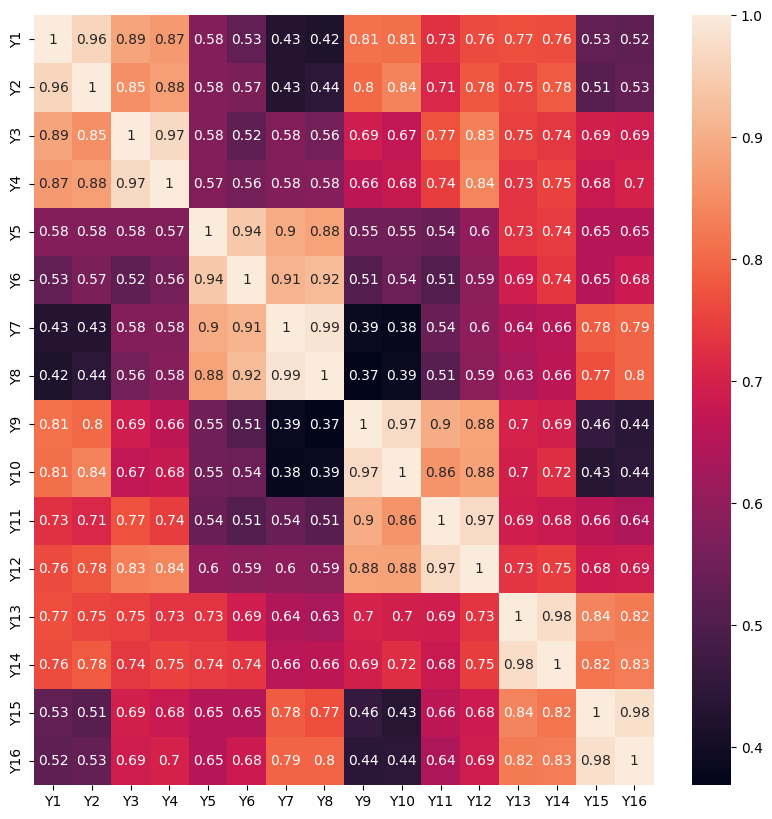

In [10]:
from tables import Column
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
# taking all rows but only 6 columns
fig, ax = plt.subplots(figsize=(10,10))
df_small=pd.DataFrame(Ypred2)
#df_small = y_test.iloc[:,:3]
features=['Y1','Y2','Y3','Y4','Y5','Y6','Y7','Y8','Y9','Y10','Y11','Y12','Y13','Y14','Y15','Y16']
correlation_mat = df_small.corr('pearson')
sns.heatmap(correlation_mat, annot = True,yticklabels=features,xticklabels=features)
plt.show()

In [19]:
from math import sqrt
from sklearn.metrics import mean_squared_error
#rmse = np.sqrt(((Ypred2 - y_test) ** 2).mean())
rmse = sqrt(mean_squared_error(y_test, Ypred2))
# Calculate mean of true values
mean_true_values = np.mean(y_test)
# Calculate relative RMSE
relative_rmse = rmse / mean_true_values
# Calculate Average Relative RMSE
average_relative_rmse = np.mean(relative_rmse)
# Calculate Percentage of Average Relative RMSE
percentage_average_relative_rmse = average_relative_rmse * 100
print("RMSE:", rmse)
print("Relative RMSE:", relative_rmse)
print("arrmse:", average_relative_rmse)
print(f"Percentage arrmse = {percentage_average_relative_rmse:.2f}%")

import numpy as np
def calculate_rrmse(y_test, Ypred2):
# Calculate RMSE
  rmse = np.sqrt(((y_test - Ypred2) ** 2).mean())
# Calculate the range of the data
  data_range = np.max(y_test) - np.min(y_test)

RMSE: 167.45901061597306
Relative RMSE: LBL        0.139387
MTLp2A     0.130752
MTLp3A     0.130683
MTLp4A     0.122740
MTLp5A     0.107185
MTLp6A     0.101249
MTLp7A     0.101455
MTLp8A     0.096644
MTLp9A     0.141466
MTLp10A    0.131951
MTLp11A    0.132261
MTLp12A    0.124405
MTLp13A    0.106732
MTLp14A    0.101476
MTLp15A    0.102064
MTLp16A    0.097248
dtype: float64
arrmse: 0.11673116831729927
Percentage arrmse = 11.67%


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
